# Predicting Condition Flare Up in Patients with Respiratory Disease History

## Import Libraries

In [78]:
import pandas as pd                         # pandas is a dataframe library
import matplotlib.pyplot as plt             # matplotlib.pyplot plots data
import numpy as np                          # numpy provides N-dim object support

# do ploting inpline instead of in a separate window
%matplotlib inline

## Load and review data

In [79]:
df = pd.read_csv(r'C:\Users\sachin_kumar\CPOD\training_data.csv') # load the development data
df_scoring = pd.read_csv(r'C:\Users\sachin_kumar\CPOD\scoring_data.csv') # load the validation data

In [80]:
df.shape

(1687, 62)

In [81]:
df_scoring.shape

(298, 61)

In [82]:
df.head(5)

,Pat_ID,Flare_Up,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,...,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4
0,1,0,1,0.246004,0.391931,0.237792,0,0.443526,0,0.000000,...,0,0.126230,0.1032,0.2439,0.0597,0.0,0.411765,0.263620,0.482759,0.1875
1,2,1,1,0.225851,0.268012,0.268481,0,0.286501,0,0.000000,...,0,0.607070,0.3808,0.8637,0.4949,0.1,0.117647,0.098418,0.624138,0.0000
2,3,0,0,0.342599,0.476945,0.296468,1,0.159780,1,0.166667,...,0,0.775410,0.6318,1.0000,0.6570,0.3,0.035294,0.020211,0.510345,0.0000
3,4,0,1,0.246699,0.347262,0.256707,0,0.424242,0,0.000000,...,1,0.298258,0.6181,0.4178,0.1164,0.4,0.176471,0.132689,0.572414,0.0000
4,5,1,0,0.270327,0.449568,0.239143,0,0.641873,1,0.250000,...,0,0.642008,0.7250,0.8587,0.4634,0.5,0.411765,0.378735,0.708621,0.0000


In [109]:
df_scoring.head(5)

,Pat_ID,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,DisHis2,...,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4
0,6,0,0.430160,0.596542,0.323297,0,0.867769,0,0.0,0,...,0,0.273566,0.1074,0.7282,0.0469,0.3,0.082353,0.085237,0.724138,0.145833
1,9,0,0.218902,0.484150,0.177958,0,0.225895,0,0.0,0,...,0,0.456557,0.1791,0.7896,0.3212,0.2,0.176471,0.144991,0.620690,0.000000
2,15,0,0.628909,0.433718,0.594094,1,0.363636,0,0.0,0,...,0,0.396414,0.2596,0.8032,0.1836,0.2,0.058824,0.052724,0.637931,0.062500
3,25,1,0.236275,0.268012,0.280255,0,0.388430,0,0.0,0,...,0,0.000000,0.0000,0.0000,0.0000,0.1,0.176471,0.118629,0.517241,0.104167
4,27,1,0.397498,0.327089,0.425787,0,0.063361,0,0.0,0,...,0,0.058709,0.0000,0.1847,0.0000,0.0,0.176471,0.087873,0.396552,0.062500


In [83]:
df.tail(5)

,Pat_ID,Flare_Up,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,...,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4
1682,1981,0,1,0.388464,0.461095,0.347037,0,0.567493,0,0.0,...,0,0.123566,0.1247,0.2951,0.0198,0.0,0.176471,0.131810,0.568966,0.125000
1683,1982,0,1,0.338429,0.177233,0.448369,0,0.311295,0,0.0,...,0,0.575512,0.8003,0.7282,0.3921,0.4,0.352941,0.264499,0.570690,0.000000
1684,1983,0,1,0.343294,0.325648,0.368848,0,0.531680,0,0.0,...,0,0.000000,0.0000,0.0000,0.0000,0.0,0.411765,0.219684,0.396552,0.291667
1685,1984,0,0,0.442669,0.494236,0.381780,0,0.842975,0,0.0,...,0,0.291906,0.2620,0.6619,0.0758,0.1,0.411765,0.219684,0.396552,0.625000
1686,1985,0,0,0.420431,0.670029,0.285080,0,0.096419,0,0.0,...,0,0.490676,0.1828,0.6124,0.4828,0.4,0.117647,0.062390,0.436207,0.000000


### Definition of features

In [84]:
definitions = pd.read_csv(r'C:\Users\sachin_kumar\CPOD\definition_features.csv') # load the definition of columns

In [85]:
definitions.shape

(62, 4)

In [86]:
definitions.head(62)

,Variable Name,Category,Type,Linked
0,PAT_ID,Identifier,NaN,NaN
1,Flare_Up,Group,Binary,
2,Demo1,Demographics,Binary,
3,Demo2,Demographics,Continuous,
4,Demo3,Demographics,Continuous,
5,Demo4,Demographics,Continuous,
6,Demo5,Demographics,Binary,
7,Demo6,Demographics,Continuous,
8,DisHis1,Disease History,Binary,1
9,DisHis1Times,Disease History,Continuous,1


### Check for null values

In [87]:
df.isnull().values.any()

False

In [88]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlational matrix for each pair of columns in the dataframe.

    Input:
         df: pandas dataframes
         size: vertical and horizontal size of plot

    Displays:
        matrix of correlational between columns. Blue-cyan-yellow-red-darked => less to more correlated
                                                    0 ----------------------> 1
                                                    Expect a darked line running from top left to bottom right

    """

    corr = df.corr()            # data frame correlated function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)            # color code the rectangles by correction value
    plt.xticks(range(len(corr.columns)), corr.columns)   # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)   # draw y tick marks

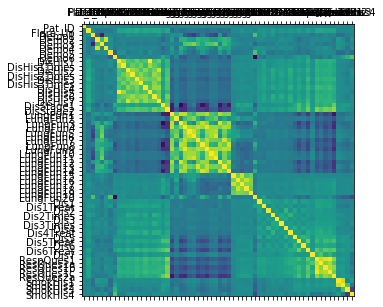

In [89]:
plot_corr(df,5)

In [90]:
df.corr()

,Pat_ID,Flare_Up,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,...,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4
Pat_ID,1.000000,-0.025311,0.003737,0.086404,0.018204,0.087270,-0.001883,-0.013683,-0.005044,-0.038404,...,-0.009512,-0.031573,-0.013793,-0.034973,-0.029493,-0.034760,0.010951,-0.015570,-0.035444,0.023280
Flare_Up,-0.025311,1.000000,0.044287,-0.107055,-0.088280,-0.078698,-0.094587,0.021601,0.238223,0.208488,...,0.111943,0.255431,0.258288,0.217019,0.239256,0.220562,0.001384,0.003023,0.018410,0.010162
Demo1,0.003737,0.044287,1.000000,-0.293814,-0.708829,0.036764,0.006228,-0.051326,0.008375,-0.008215,...,-0.088022,-0.027058,-0.083035,0.027011,-0.045482,-0.019431,-0.182668,-0.181781,-0.054511,-0.029770
Demo2,0.086404,-0.107055,-0.293814,1.000000,0.423158,0.882432,0.077041,-0.104787,-0.033811,-0.021149,...,-0.001103,0.007963,0.007299,0.027850,-0.009578,-0.128474,0.137207,0.048694,-0.147053,0.077193
Demo3,0.018204,-0.088280,-0.708829,0.423158,1.000000,-0.040883,0.037461,-0.047243,-0.059492,-0.021419,...,0.026307,-0.086576,-0.024535,-0.118415,-0.068253,-0.074975,0.097089,0.068551,-0.023256,0.015432
Demo4,0.087270,-0.078698,0.036764,0.882432,-0.040883,1.000000,0.074426,-0.096087,-0.003111,-0.009983,...,-0.010955,0.057803,0.020182,0.097068,0.029261,-0.101904,0.095261,0.012516,-0.152583,0.077071
Demo5,-0.001883,-0.094587,0.006228,0.077041,0.037461,0.074426,1.000000,-0.333362,0.076948,0.074660,...,-0.066692,0.032784,0.007951,0.029792,0.037969,-0.005104,-0.213763,-0.217249,-0.080845,-0.229561
Demo6,-0.013683,0.021601,-0.051326,-0.104787,-0.047243,-0.096087,-0.333362,1.000000,-0.053323,-0.083819,...,-0.079894,-0.068789,-0.110041,0.016854,-0.110188,0.100348,0.085628,0.214360,0.340373,0.495863
DisHis1,-0.005044,0.238223,0.008375,-0.033811,-0.059492,-0.003111,0.076948,-0.053323,1.000000,0.734087,...,0.092772,0.340635,0.276170,0.310292,0.326165,0.289852,0.032625,0.034765,0.020936,-0.063081
DisHis1Times,-0.038404,0.208488,-0.008215,-0.021149,-0.021419,-0.009983,0.074660,-0.083819,0.734087,1.000000,...,0.091010,0.308442,0.262190,0.264560,0.303960,0.234159,0.029540,0.020280,-0.014127,-0.068512


In [91]:
df.head(5)

,Pat_ID,Flare_Up,Demo1,Demo2,Demo3,Demo4,Demo5,Demo6,DisHis1,DisHis1Times,...,Dis7,RespQues1,ResQues1a,ResQues1b,ResQues1c,ResQues2a,SmokHis1,SmokHis2,SmokHis3,SmokHis4
0,1,0,1,0.246004,0.391931,0.237792,0,0.443526,0,0.000000,...,0,0.126230,0.1032,0.2439,0.0597,0.0,0.411765,0.263620,0.482759,0.1875
1,2,1,1,0.225851,0.268012,0.268481,0,0.286501,0,0.000000,...,0,0.607070,0.3808,0.8637,0.4949,0.1,0.117647,0.098418,0.624138,0.0000
2,3,0,0,0.342599,0.476945,0.296468,1,0.159780,1,0.166667,...,0,0.775410,0.6318,1.0000,0.6570,0.3,0.035294,0.020211,0.510345,0.0000
3,4,0,1,0.246699,0.347262,0.256707,0,0.424242,0,0.000000,...,1,0.298258,0.6181,0.4178,0.1164,0.4,0.176471,0.132689,0.572414,0.0000
4,5,1,0,0.270327,0.449568,0.239143,0,0.641873,1,0.250000,...,0,0.642008,0.7250,0.8587,0.4634,0.5,0.411765,0.378735,0.708621,0.0000


### Splitting the data 

70% for trainingn and 30% for testing data

In [117]:
from sklearn.model_selection import train_test_split

#feature_col_names = ['Demo1','Demo2','Demo3','Demo4','Demo5','Demo6','DisHis1','Dis7']
feature_col_names = ['Demo1','Demo2','Demo3','Demo4','Demo5','Demo6','DisHis1','DisHis1Times','DisHis2','DisHis2Times','DisHis3','DisHis3Times','DisHis4','DisHis5','DisHis6','DisHis7','DisStage1','DisStage2','LungFun1','LungFun10','LungFun11','LungFun12','LungFun13','LungFun14','LungFun15','LungFun16','LungFun17','LungFun18','LungFun19','LungFun2','LungFun20','LungFun3','LungFun4','LungFun5','LungFun6','LungFun7','LungFun8','LungFun9','Dis1','Dis1Treat','Dis2','Dis2Times','Dis3','Dis3Times','Dis4','Dis4Treat','Dis5','Dis5Treat','Dis6','Dis6Treat','Dis7','RespQues1','ResQues1a','ResQues1b','ResQues1c','ResQues2a','SmokHis1','SmokHis2','SmokHis3','SmokHis4']

predicated_class_name = ['Flare_Up']

X = df[feature_col_names].values                # predicator feature columns (8 x m)
y = df[predicated_class_name].values            # predicated class column (1 x n)
split_test_size = 0.30

X_train,X_test,y_train,y_test = train_test_split(X, y, shuffle=True, test_size=split_test_size, random_state=42)
                        # test_size = 0.30 is 30%, 42 is the answer to everything 

### We check to ensure we have the desired 70% train and 30% test split of the data

In [118]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in testing set".format((len(X_test)/len(df.index))*100))

print("{0:0.2f}% in validation set".format(((len(df_scoring[:]+len(df[:])))/len(df.index))*100))

69.95% in training set
30.05% in testing set
17.66% in validation set


#### Verifying predicate value was split correctly

In [119]:
print("Original True : {0} ({1:0.02f}%)".format(len(df.loc[df['Flare_Up'] == 1]), (len(df.loc[df['Flare_Up'] == 1])/len(df.index)* 100)))
print("Original False : {0} ({1:0.02f}%)".format(len(df.loc[df['Flare_Up'] == 0]), (len(df.loc[df['Flare_Up'] == 0])/len(df.index)* 100)))
print("")
print("Traning True : {0} ({1:0.02f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)* 100)))
print("Traning False : {0} ({1:0.02f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)* 100)))
print("")
print("Test True : {0} ({1:0.02f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)* 100)))
print("Test False : {0} ({1:0.02f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)* 100)))
print("")

print("Validation True : {0} ({1:0.02f}%)".format(len(df_scoring.loc[df['Flare_Up'] == 1]), (len(df_scoring.loc[df['Flare_Up'] == 1])/len(df_scoring.index)* 100)))
print("Validation False : {0} ({1:0.02f}%)".format(len(df_scoring.loc[df['Flare_Up'] == 0]), (len(df_scoring.loc[df['Flare_Up'] == 0])/len(df_scoring.index)* 100)))
print("")

Original True : 219 (12.98%)
Original False : 1468 (87.02%)

Traning True : 147 (12.46%)
Traning False : 1033 (87.54%)

Test True : 72 (14.20%)
Test False : 435 (85.80%)

Validation True : 42 (14.09%)
Validation False : 256 (85.91%)



## Training initial Algoritham - Naive Bayes

In [120]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data

In [121]:
# predict value using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

#Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7373



### Performance on Testing Data

In [122]:
# predict value using the testing data
nb_predict_test = nb_model.predict(y_test)

# import the performance metrics library
from sklearn import metrics

#Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 1.0000



#### Metrics

In [123]:
print("Confusion Metrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))



Confusion Metrix
[[435   0]
 [  0  72]]

Classification Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       435
          1       1.00      1.00      1.00        72

avg / total       1.00      1.00      1.00       507



### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)       # create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [125]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9856


In [126]:
rf_predict_test = rf_model.predict(X_test)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.8560


In [102]:
print("Confusion Metrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Metrix
[[428   7]
 [ 66   6]]

Classification Report
             precision    recall  f1-score   support

          0       0.87      0.98      0.92       435
          1       0.46      0.08      0.14        72

avg / total       0.81      0.86      0.81       507



### Logistic Regression

Accuracy (train): 0.8873
Accuracy (test): 0.8560
[[429   6]
 [ 67   5]]
             precision    recall  f1-score   support

          0       0.86      0.99      0.92       435
          1       0.45      0.07      0.12        72

avg / total       0.81      0.86      0.81       507



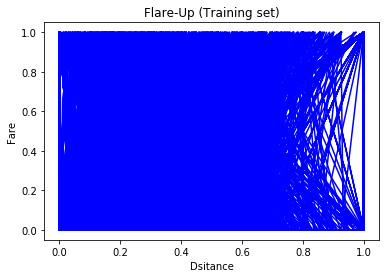

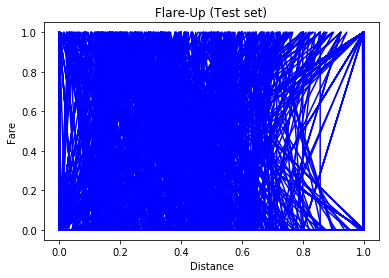

In [147]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())

lr_predict_train = lr_model.predict(X_train)
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy (train): {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))
print("Accuracy (test): {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print(metrics.classification_report(y_test, lr_predict_test))

# Visualising the Training set results
#plt.scatter(X_train, y_train.ravel(), color = 'red')
plt.plot(X_train, lr_predict_train, color = 'blue')
plt.title('Flare-Up (Training set)')
plt.xlabel('Dsitance')
plt.ylabel('Fare')
plt.show()

# Visualising the Test set results
#plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, lr_predict_test, color = 'blue')
plt.title('Flare-Up (Test set)')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

### LogisticRegressionCV

In [128]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

In [131]:
lr_cv_predict_train = lr_cv_model.predict(X_train)
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy (train): {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))
print("Accuracy (test): {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy (train): 0.7627
Accuracy (test): 0.7456
[[334 101]
 [ 28  44]]
             precision    recall  f1-score   support

          0       0.92      0.77      0.84       435
          1       0.30      0.61      0.41        72

avg / total       0.83      0.75      0.78       507



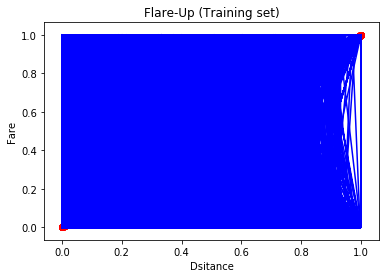

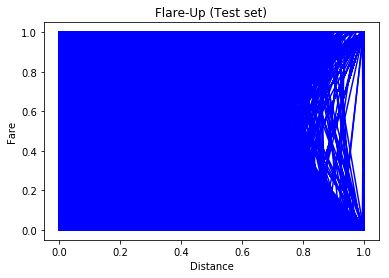

In [143]:
# Visualising the Training set results
plt.scatter(X_train, X_train, color = 'red')
plt.plot(X_train, lr_cv_predict_train, color = 'blue')
plt.title('Flare-Up (Training set)')
plt.xlabel('Dsitance')
plt.ylabel('Fare')
plt.show()

# Visualising the Test set results
#plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, lr_cv_predict_test, color = 'blue')
plt.title('Flare-Up (Test set)')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()